In [1]:
import pandas as pd

In [2]:
#read csv file directly from a URL and save the results
data =pd.read_csv('E:/DemoPython/OldPrcatice/LinerRegression/Advertising.csv')

In [3]:
# display the first 5 rows
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# display the last 5 rows
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
# check the shape of the DataFrame
data.shape

(200, 5)

#### 分析数据

因为响应量是一个连续的值，所以这个问题是一个回归问题。数据集一共有200个观测值，每一组观测对应一个市场的情况。

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

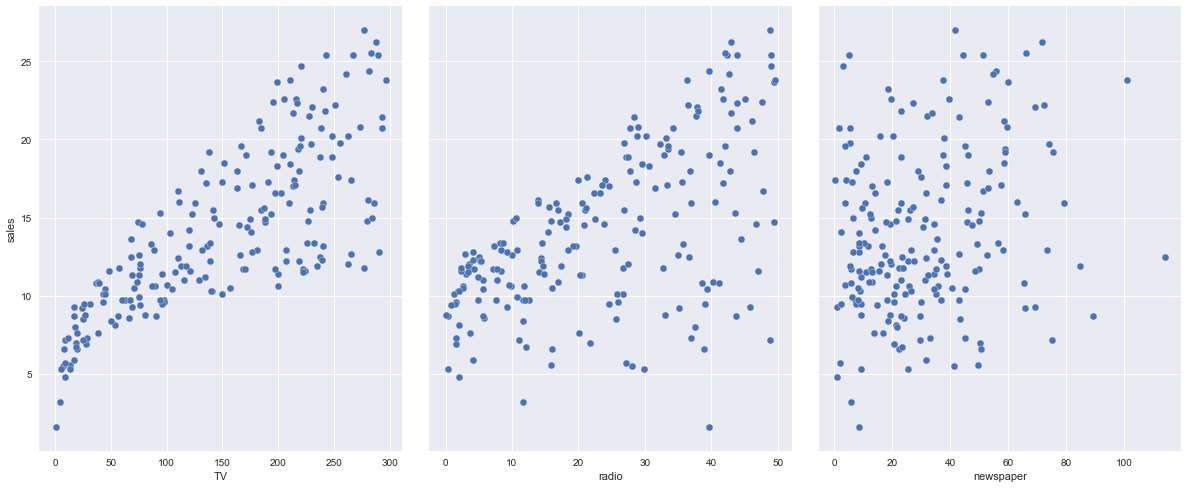

In [11]:
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=7,aspect=0.8)
plt.show()

#### 解析
上图绘制的是X的每一个维度与对应Y的散点图，通过设置size和aspect参数来调节显示的大小和比例。
* 可以看出，TV和销量是有比较强的线性关系的，而radio和sales线性关系比较弱。
* 通过加一个参数 kind ='reg',seaborn可以添加一条最佳拟合直线和95%的置信带。

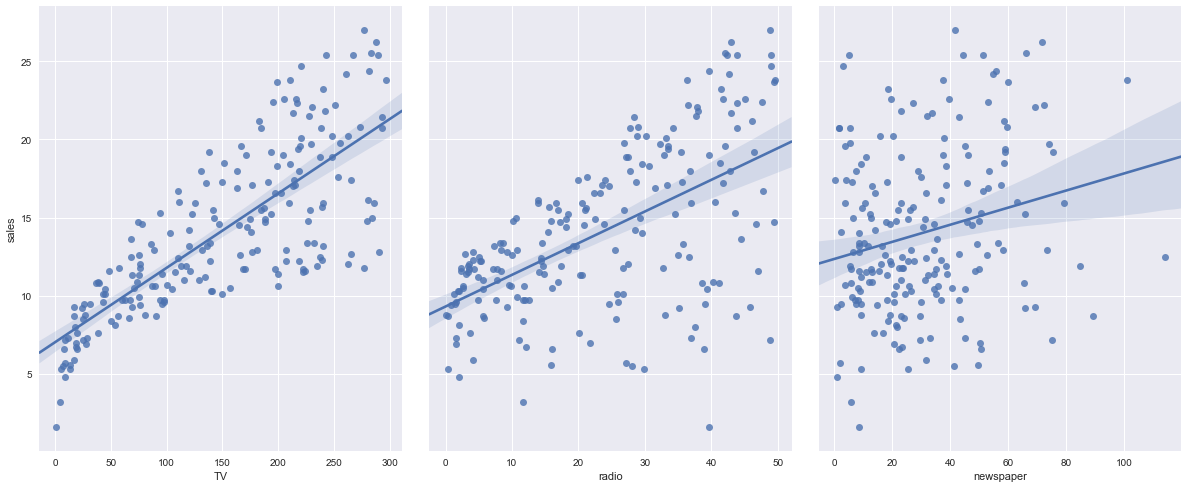

In [12]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=7,aspect=0.8,kind='reg')
plt.show()

#### 线性回归模型
* 优点：快速；没有调节参数；可轻易解释；可理解
* 缺点：预测准确率不是太高，因为它假设特征和响应之间存在确定的线性关系，这种假设对于非线性的关系，无法很好地建模。

在这个列子中，使用pandas来构建X（特征向量）和Y（标签列）：

（1）scikit-learn要求x是一个特征矩阵，y是一个NumPy向量

（2）pandas构建在NumPy之上

（3）因此，X可以是pandas的DataFrame,y可以是pandas的Series,scikit-learn可以理解这种结构。

In [14]:
# create a python list of feature names
feature_cols = ['TV','radio','newspaper']

In [15]:
# use the list to select a subset of the original DataFrame
X = data[feature_cols]

In [17]:
# equivalent command to do this in one line
X = data[['TV','radio','newspaper']]

In [20]:
# print the first 5 rows
print(X.head())

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [21]:
# check the type and shape of X
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [22]:
print(X.shape)

(200, 3)


In [23]:
# select a Series from the DataFrame
y = data['sales']

In [24]:
# equivalent command that works if there are no spaces in the column name
y = data.sales

In [25]:
# print the first 5 values
print(y.head())

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [27]:
type(y)

pandas.core.series.Series

#### 构建训练集与测试集

In [28]:
# 引入交叉验证
from sklearn.cross_validation import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [31]:
# default spilt is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


#### sklearn的线性回归

In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [33]:
model = linreg.fit(X_train,y_train)
print(model)
print(linreg.intercept_)
print(linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [50]:
# pair the feature names with the coefficients
list(zip(feature_cols,linreg.coef_))

[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.0034504647111803779)]

#### 在python3中zip返回值有所改变：
```
a = [1,2,3,4]
b = [5,6,7,8]
c = zip(a,b)
c
<zip object at 0x03496878>
```
可以看到返回的是一个对象，如果想要得到list可以用list(c)，进行强转，得到想要的结果

#### 预测

In [51]:
y_pred = linreg.predict(X_test)
print(y_pred)
print(type(y_pred))

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]
<class 'numpy.ndarray'>


#### 回归问题的评价测度

对于分类问题，评价测度是准确率，但不适用于回归问题。我们使用针对连续数值的评价测度（evaluation metrics）

* 平均绝对误差（Mean Absolute Error, MAE）
* 均方误差（Mean Squared Error,MSE）
* 均方根误差（Root Mean Squared Error, RMSE）

In [52]:
# 计算sales预测的RMSE

print(type(y_pred),type(y_test))
print(len(y_pred),len(y_test))
print(y_pred.shape,y_test.shape)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
50 50
(50,) (50,)


In [53]:
from sklearn import metrics
import numpy as np
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_error = np.sqrt(sum_mean/50)

In [54]:
# caculate RMSE by hand
print("RMSE by hand:",sum_error)

RMSE by hand: 1.40465142303


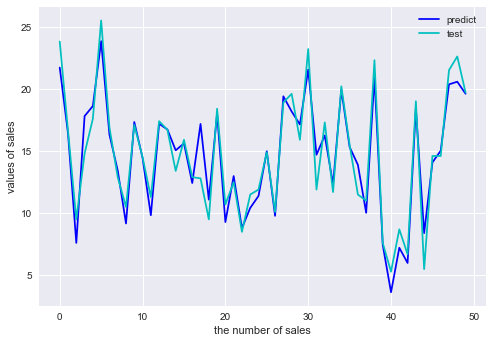

In [58]:
#### 做ROC曲线

import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'c',label="test")
plt.legend(loc="upper right") # 显示图中的曲线
plt.xlabel("the number of sales")
plt.ylabel("values of sales")
plt.show()